# Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
from matplotlib import style 
import matplotlib.pyplot as plt 
import plotly.express as py 
import graphviz
style.use('ggplot')

import re
import joblib

import nltk 
nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('porter_test')
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from scipy.sparse import coo_matrix
from scipy.special import expit

from pathlib import Path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package porter_test to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package porter_test is already up-to-date!


# Read Data

In [2]:
df = pd.read_csv("data/cleaned.csv")
df.head()

,Unnamed: 0,text,sentiment,word_count
0,0,daughter like aghast charact movi smoke isnt a...,1,142
1,1,word word describ tri sake brave peopl stick k...,1,325
2,2,film basic poor take old urban legend babysitt...,1,131
3,3,terribl movi im even sure terribl ugli one tre...,1,156
4,4,first movi piec realiti well realiz artist kin...,2,173


# Visualising of pos and neg reviews (using word cloud)

We create a function that returns the DataFrame containing the **number of duplicates of each unique word** when we pass in the **positive or negative reviews'** DataFrame.

In [3]:
def WordCountDF(review):
    from collections import Counter
    count = Counter()
    
    # Count the number of words
    for text in review['text'].values:
        for word in text.split():
            count[word] += 1
    
    words = [key for key in count]
    count = [count[key] for key in words]
    
    # Create the data frame from the lists
    resultDF = pd.DataFrame([words,count])
    resultDF = resultDF.T
    resultDF.columns = ['word', 'count']

    # Sort the value and reindex
    resultDF.sort_values(by = 'count', ascending = False, inplace = True)
    resultDF.reset_index(drop = True, inplace = True)
    return resultDF

## Positive Reviews

In [4]:
# Separate out the pos reviews
pos_reviews = df[df.sentiment == 2]
pos_reviews.head()

,Unnamed: 0,text,sentiment,word_count
4,4,first movi piec realiti well realiz artist kin...,2,173
8,8,want see film star stan laurel laurel hardi co...,2,103
11,11,cocki medic student play chicken process simul...,2,98
12,12,movi excel portray realiti sexual abus daughte...,2,111
14,14,year year final track film die see live memori...,2,247


### Visualise the frequency of each words using **word cloud**

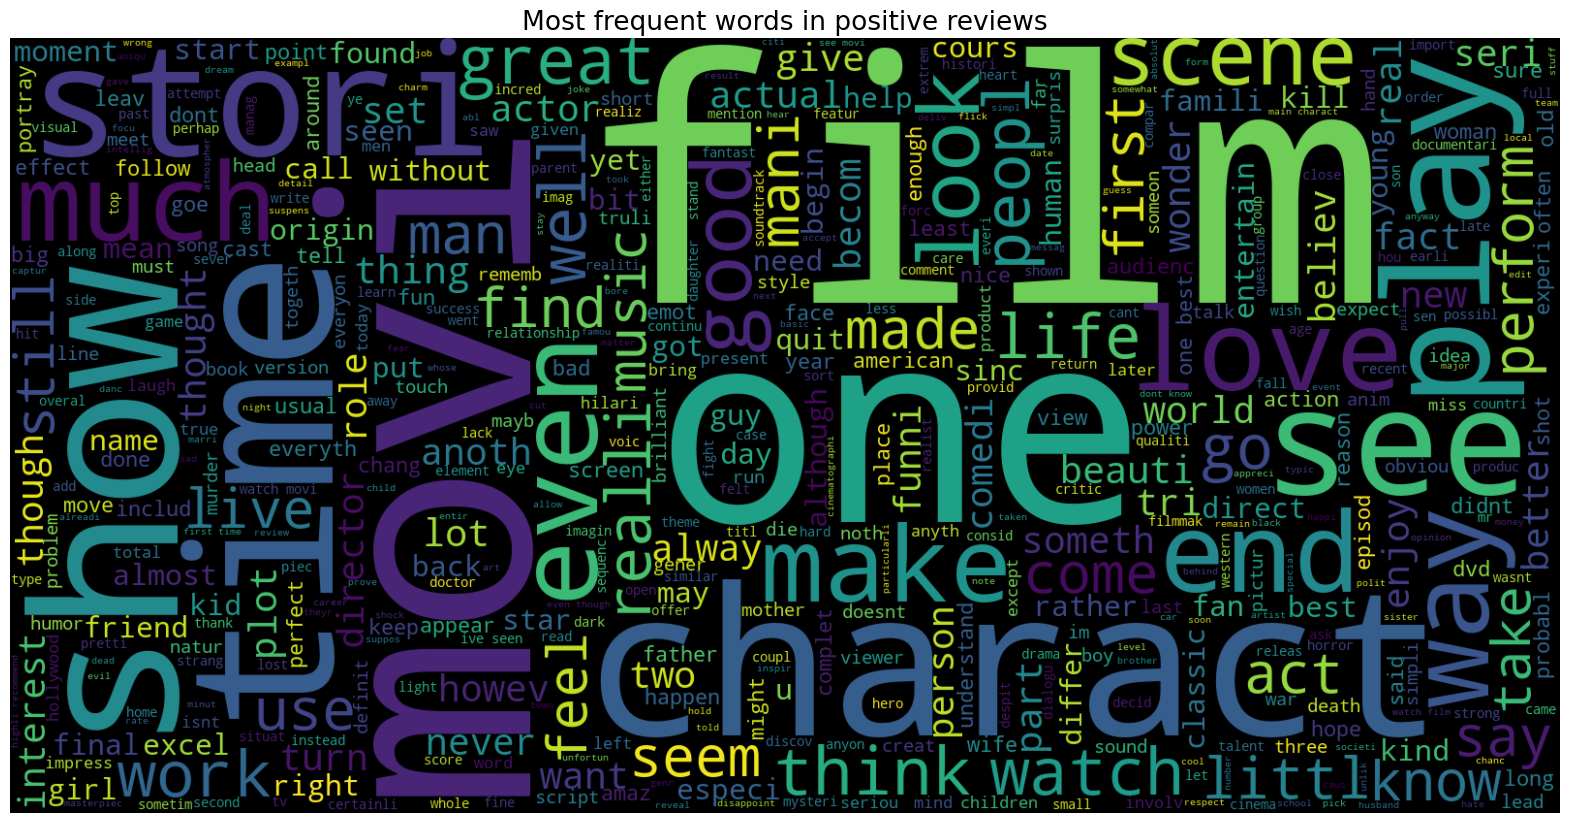

In [5]:
# Use word cloud to visualise positive reviews
text = ' '.join([word for word in pos_reviews['text']])
plt.figure(figsize=(20,15))
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

### Create a DataFrame for the Positive Review Word's Frequency

In [6]:
# Create a DataFrame for positive reviews
pos_words = WordCountDF(pos_reviews)
pos_words

,word,count
0,film,24502
1,movi,21196
2,one,13381
3,like,9751
4,time,7541
...,...,...
68930,themeit,1
68931,valueformoneyin,1
68932,scoresscor,1
68933,nonrper,1


## Negative Reviews

In [7]:
# Separate out the negative reviews
neg_reviews = df[df.sentiment == 1]
neg_reviews.head()

,Unnamed: 0,text,sentiment,word_count
0,0,daughter like aghast charact movi smoke isnt a...,1,142
1,1,word word describ tri sake brave peopl stick k...,1,325
2,2,film basic poor take old urban legend babysitt...,1,131
3,3,terribl movi im even sure terribl ugli one tre...,1,156
5,5,young lass beauti joan woodburi rita adam orph...,1,231


In [8]:
neg_reviews = df[df.sentiment == 1]
neg_reviews.head()

,Unnamed: 0,text,sentiment,word_count
0,0,daughter like aghast charact movi smoke isnt a...,1,142
1,1,word word describ tri sake brave peopl stick k...,1,325
2,2,film basic poor take old urban legend babysitt...,1,131
3,3,terribl movi im even sure terribl ugli one tre...,1,156
5,5,young lass beauti joan woodburi rita adam orph...,1,231


### Visualise the frequency of each words using **word cloud**

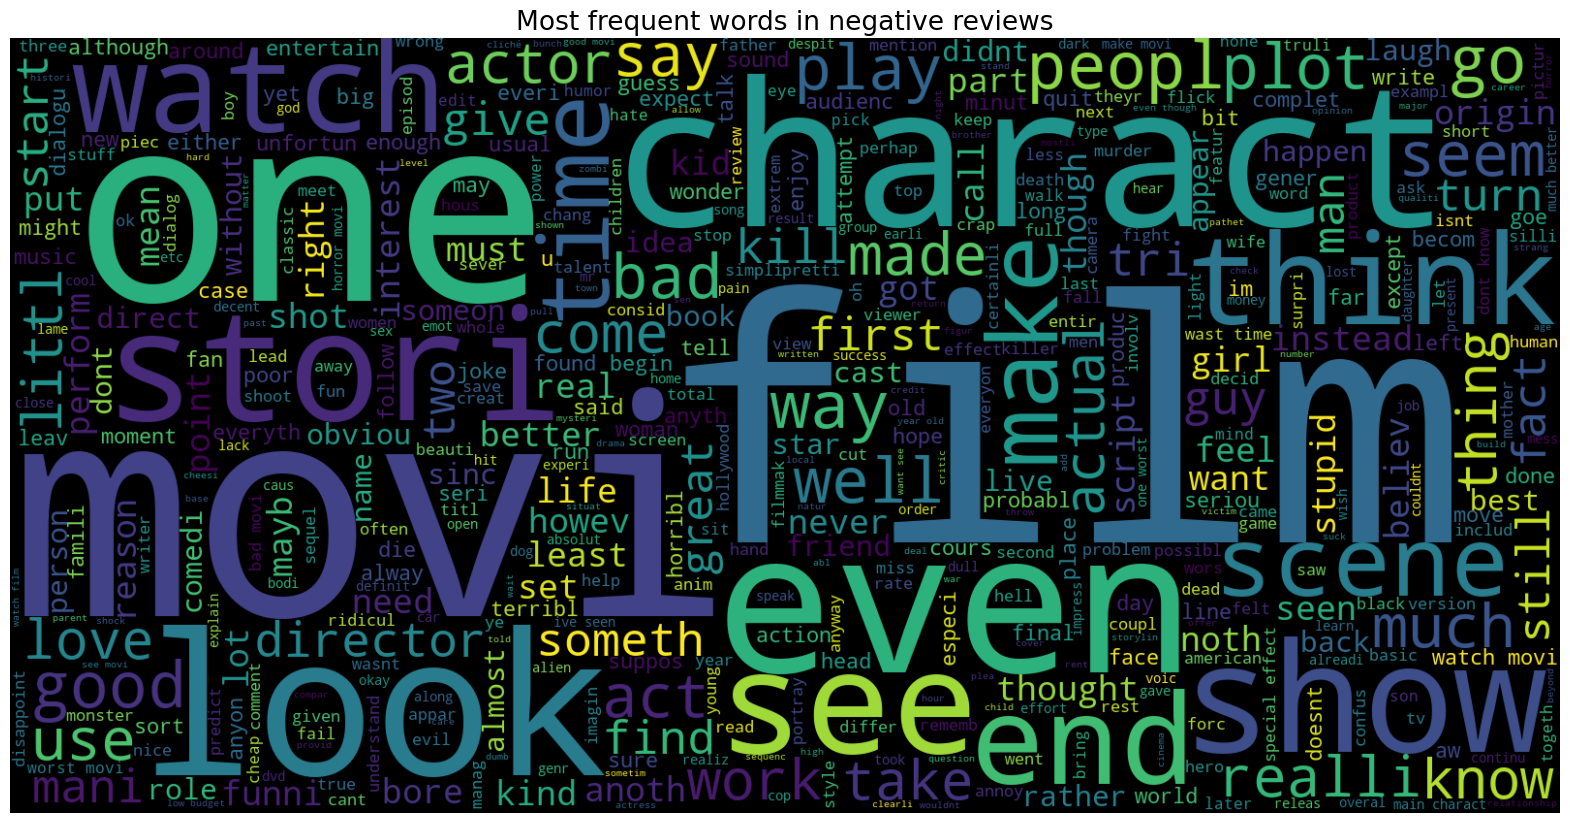

In [9]:
# Use word cloud to visualise negative reviews
text = ' '.join([word for word in neg_reviews['text']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

### Create a DataFrame for the Negative Review Word's Frequency

In [10]:
# Create a DataFrame for negative reviews
neg_words = WordCountDF(neg_reviews)
neg_words

,word,count
0,movi,27809
1,film,20954
2,one,12761
3,like,11830
4,make,7498
...,...,...
68699,dem,1
68700,geniusduh,1
68701,pileor,1
68702,handednot,1


# Create a train set and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                  df['sentiment'], test_size = 0.2)

In [12]:
X_train.head()

24188    say flick doesnt deserv appel movi certainli f...
8007     net first advertis ad made look ridicul saw ac...
6320     let depart mani comment ive read say film rank...
24536    one imdb review put imagin 2001 space odyssey ...
7942     one lh short frequent cite first real lh team ...
Name: text, dtype: object

## TFIDF (term frequency inverse document frequency) Vectorisation

We fit our data into the TFIDF. This will tokenize (i.e separate each word of the data each cell in the data and build the vocabulary from it). But we will have n-grams parameter as (1, 3) which means they can form a word or a group of words which makes sense (e.g `good` is positive, but `not good` is negative)

In [13]:
vect = TfidfVectorizer(min_df = 5, ngram_range = (1, 3)).fit(X_train)
len(vect.get_feature_names_out())

76292

We transform our text into the matrix form which contain a bunch of words of each cell of the DataFrame

In [14]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<19839x76292 sparse matrix of type '<class 'numpy.float64'>'
	with 2543910 stored elements in Compressed Sparse Row format>

# Train and Predict using Logistic Regression model

We use the LogisticRegression model to apply to our data

In [15]:
model = LogisticRegression(max_iter = 80000)

Then we fit our Train dataset into our model

In [16]:
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=80000)

Now, we predict our Test dataset

In [17]:
predictions = model.predict(vect.transform(X_test))

We print out the AUC (Area Under the ROC (receiver operating characteristic curve) Curve) score<br>
AUC ranges from 0 to 1. Prediction with 100% wrong has the value of 0 and 100% correct has the value of 1.

- *ROC curve plot two parameters: True Positive Rate and False Positive Rate*<br>
*AUC measures how well predictions are ranked, rather than their absolute values<br>

*ROC Curve and AUC. (n.d.). Google Developers. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.*

In [18]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9042338709677419


The Classification_report function computes and reports the micro and macro averaged versions of precision, recall and F1 scores across all classes. The micro-average scores are calculated by treating all instances and predictions as a single set, while the macro-average scores are calculated by averaging the scores for each class seperately.

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.89      0.90      2480
           2       0.89      0.92      0.91      2480

    accuracy                           0.90      4960
   macro avg       0.90      0.90      0.90      4960
weighted avg       0.90      0.90      0.90      4960



Let's plot out the confusion matrix



              precision    recall  f1-score   support

           1       0.92      0.89      0.90      2480
           2       0.89      0.92      0.91      2480

    accuracy                           0.90      4960
   macro avg       0.90      0.90      0.90      4960
weighted avg       0.90      0.90      0.90      4960



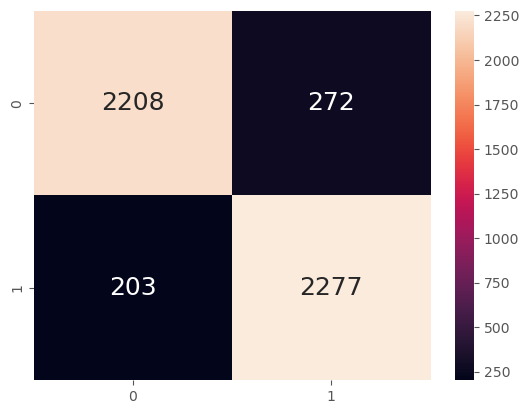

In [20]:
sb.heatmap(confusion_matrix(y_test, predictions),
           annot = True, fmt=".0f", annot_kws={"size": 18})
print("\n")
print(classification_report(y_test, predictions))

Let's print out some common words for positive reviews and negative review

In [21]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()

print('Negative words:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Positive words:\n{}'.format(feature_names[sorted_coef_index[-11:-1]]))

Negative words:
['bad' 'worst' 'wast' 'aw' 'bore' 'terribl' 'noth' 'poor' 'stupid'
 'disappoint']

Positive words:
['favorit' 'dvd' 'brilliant' 'one best' 'amaz' 'enjoy' 'perfect' 'best'
 'love' 'excel']


In [22]:
print(model.predict(vect.transform(['This film has got to be the epitome of terrible writing and should be a classroom example of \'what not to do\' when writing a screenplay. Why would Joshua take on (clearly) amateur writer Adam Gaines script is beyond me. Even his good directing and excellent cinematography could not save this disaster'])))

[1]


We create a function to check for positive and negative

In [23]:
def check_pos_neg(sentiment):
  if (sentiment == 1):
    print("This is a negative review.")
  else:
    print("This is a positive review.")

We find a random **negative** review online which is not in the dataset. Lets see how good is our model.

In [24]:
random_reviews = ['This film has got to be the epitome of terrible writing and should be a classroom example of \'what not to do\' when writing a screenplay. Why would Joshua take on (clearly) amateur writer Adam Gaines script is beyond me. Even his good directing and excellent cinematography could not save this disaster']

In [25]:
sentiment = model.predict(vect.transform(random_reviews))
check_pos_neg(sentiment)

This is a negative review.


Export model in to a .joblib file

In [26]:
filepath = Path('model/LogisticReg.joblib')
filepath.parent.mkdir(parents=True, exist_ok=True)  
joblib.dump(model, filepath)

['model\\LogisticReg.joblib']

# Testing with other data models to find the most suitable one

## Multinomial Naive Bayes Model

In [27]:
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)
mnb_predictions = mnb.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, mnb_predictions))

AUC:  0.8899193548387097




              precision    recall  f1-score   support

           1       0.90      0.88      0.89      2480
           2       0.88      0.90      0.89      2480

    accuracy                           0.89      4960
   macro avg       0.89      0.89      0.89      4960
weighted avg       0.89      0.89      0.89      4960



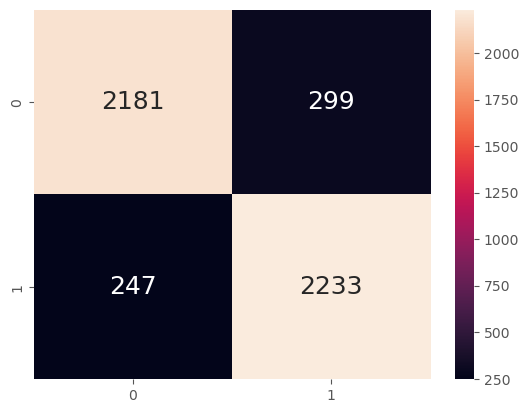

In [28]:
sb.heatmap(confusion_matrix(y_test, mnb_predictions),
           annot = True, fmt=".0f", annot_kws={"size": 18})
print("\n")
print(classification_report(y_test, mnb_predictions))

Export model in to a .joblib file

In [29]:
filepath = Path('model/MultinomialNB.joblib')
filepath.parent.mkdir(parents=True, exist_ok=True)  
joblib.dump(mnb, filepath)

['model\\MultinomialNB.joblib']

## Linear Support Vector Classification Model 

In [30]:
svc = LinearSVC()
svc.fit(X_train_vectorized, y_train)
svc_predictions = svc.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, svc_predictions))

AUC:  0.9084677419354839




              precision    recall  f1-score   support

           1       0.92      0.89      0.91      2480
           2       0.90      0.92      0.91      2480

    accuracy                           0.91      4960
   macro avg       0.91      0.91      0.91      4960
weighted avg       0.91      0.91      0.91      4960



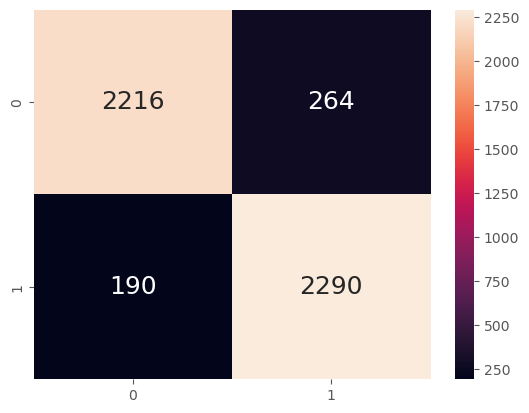

In [31]:
sb.heatmap(confusion_matrix(y_test, svc_predictions),
           annot = True, fmt=".0f", annot_kws={"size": 18})
print("\n")
print(classification_report(y_test, svc_predictions))

Export model in to a .joblib file

In [32]:
filepath = Path('model/LinearSVC.joblib')
filepath.parent.mkdir(parents=True, exist_ok=True)  
joblib.dump(svc, filepath)

['model\\LinearSVC.joblib']

## Decision Tree

In [33]:
dectree = DecisionTreeClassifier(max_depth = 10)

Fit the train data set in the decision tree

In [34]:
dectree.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
predict_Tree = dectree.predict(vect.transform(X_test))

Draw a decision tree

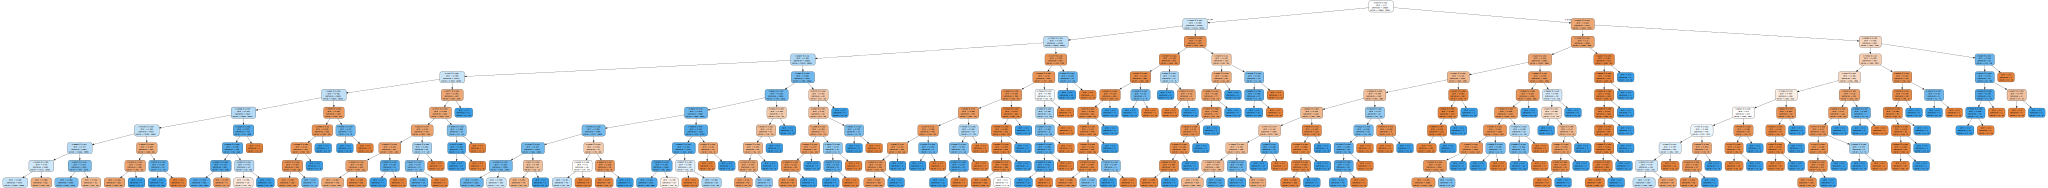

In [36]:
treedot = export_graphviz(dectree, 
                          filled=True, 
                          rounded=True, 
                          special_characters = True)

graphviz.Source(treedot)

              precision    recall  f1-score   support

           1       0.82      0.59      0.69      2480
           2       0.68      0.87      0.76      2480

    accuracy                           0.73      4960
   macro avg       0.75      0.73      0.72      4960
weighted avg       0.75      0.73      0.72      4960



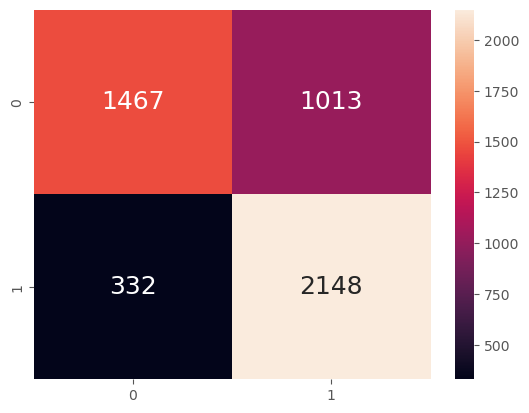

In [37]:
sb.heatmap(confusion_matrix(y_test, predict_Tree),
           annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test, predict_Tree))

In [38]:
print('AUC: ', roc_auc_score(y_test, predict_Tree))

AUC:  0.7288306451612904


Export model into a .joblib file

In [39]:
filepath = Path('model/DecTree.joblib')
filepath.parent.mkdir(parents=True, exist_ok=True)  
joblib.dump(dectree, filepath)

['model\\DecTree.joblib']

## This will export the X_train file into a CSV file for future use when we need to vectorize a string of a random data

In [40]:
filepath = Path('data/X_train.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_csv(filepath) 
filepath = Path('data/X_test.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath)
filepath = Path('data/y_test.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_csv(filepath)
filepath = Path('data/y_train.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_csv(filepath)